In [1]:
image_path = '../Datasets/flower.jpg'

(480, 640, 3)


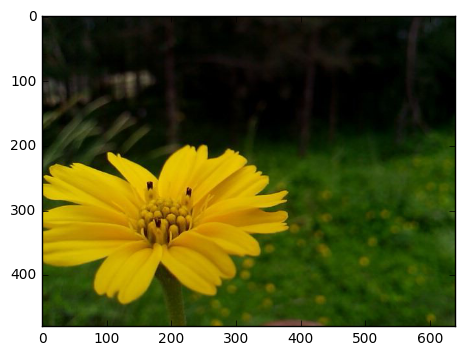

In [2]:
def loadAndShowImage(filename):
    from matplotlib import image as mpimg

    image = mpimg.imread(filename)
    print image.shape

    from matplotlib import pyplot as plt

    plt.imshow(image)
    plt.show()
    
loadAndShowImage(image_path)

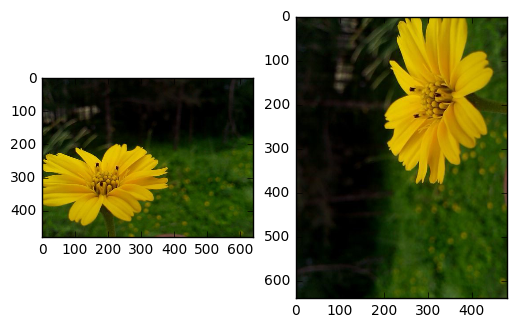

In [3]:
def rotateImage(filename):
    from matplotlib import image as mpimg
    
    image = mpimg.imread(filename)
    
    import tensorflow as tf
    
    x = tf.constant(image, name='x')
    permutation = tf.constant([1, 0, 2], name='permutation')
    x = tf.transpose(x, perm=permutation)
    
    with tf.Session() as session:
        session.run(tf.initialize_all_variables())
        result = session.run(x)
        
        tf.train.SummaryWriter('image_logs', session.graph)
    
    from matplotlib import pyplot as plt
    plt.subplot(121)
    plt.imshow(image)
    plt.subplot(122)
    plt.imshow(result)
    plt.show()
    
rotateImage(image_path)

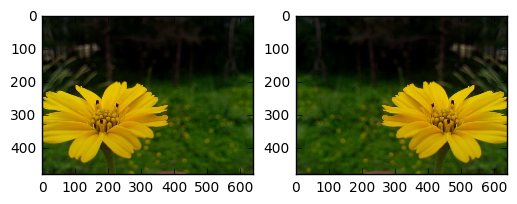

In [4]:
def fliplr(filename):
    import matplotlib.image as mpimg
    x = mpimg.imread(filename)
    
    import tensorflow as tf
    image = tf.constant(x, name='x')
    
    with tf.Session() as session:
        tf.initialize_all_variables()
        height, width, depth = session.run(tf.shape(image))
        image = tf.reverse_sequence(image, [width]*height, 1, 0)
        result = session.run(image)
        
    import matplotlib.pyplot as plt
    plt.subplot(121)
    plt.imshow(x)
    plt.subplot(122)
    plt.imshow(result)
    plt.show()
    
fliplr(image_path)

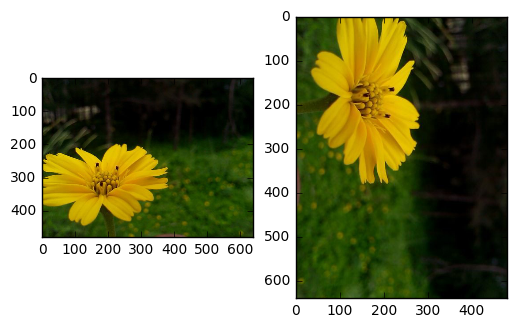

In [5]:
def rotateCW(filename):
    import matplotlib.image as mpimg
    x = mpimg.imread(filename)
    
    import tensorflow as tf
    image = tf.constant(x, name='x')
    
    with tf.Session() as session:
        tf.initialize_all_variables()
        image = tf.transpose(image, perm=[1, 0, 2])
        height, width, depth = session.run(tf.shape(image))
        image = tf.reverse_sequence(image, [width]*height, 1, 0)
        result = session.run(image)
        
    import matplotlib.pyplot as plt
    plt.subplot(121)
    plt.imshow(x)
    plt.subplot(122)
    plt.imshow(result)
    plt.show()
    
rotateCW(image_path)

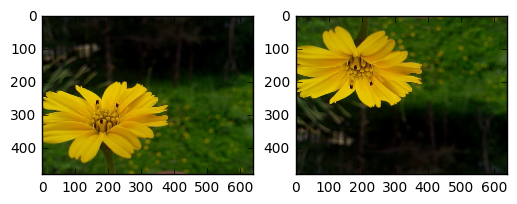

In [6]:
def flipud(filename):
    import matplotlib.image as mpimg
    x = mpimg.imread(filename)
    
    import tensorflow as tf
    image = tf.constant(x, name='x')
    
    with tf.Session() as session:
        height, width, depth = session.run(tf.shape(image))
        image = tf.reverse_sequence(image, [height]*width, 0, 1)
        result = session.run(image)
        
    import matplotlib.pyplot as plt
    plt.subplot(121)
    plt.imshow(x)
    plt.subplot(122)
    plt.imshow(result)
    plt.show()
    
flipud(image_path)

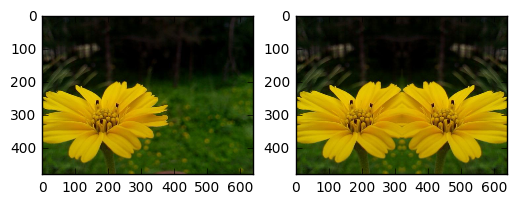

In [7]:
def mirror(filename):
    import matplotlib.image as mpimg
    x = mpimg.imread(filename)
    
    import tensorflow as tf
    import numpy as np
    image = tf.constant(np.array(x, dtype=np.int64), name='x')
        
    with tf.Session() as session:
        session.run(tf.initialize_all_variables())
        
        height, width, depth = session.run(tf.shape(image))
        
        left_mask = np.array([1]*(width/2) + [0]*(width - width/2))
        left_mask = left_mask.reshape((1, width, 1))
        left_mask = np.repeat(left_mask, height, 0)
        left_mask = np.repeat(left_mask, depth, 2)
        
        right_mask = np.array([0]*(width/2) + [1]*(width - width/2))
        right_mask = right_mask.reshape((1, width, 1))
        right_mask = np.repeat(right_mask, height, 0)
        right_mask = np.repeat(right_mask, depth, 2)
                
        image_left = tf.mul(image, left_mask)
        image = tf.reverse_sequence(image, [width]*height, 1, 0)
        image = tf.mul(image, right_mask)
        
        image = image + image_left
        result = session.run(image)
      
    import matplotlib.pyplot as plt
    plt.subplot(121)
    plt.imshow(x)
    plt.subplot(122)
    plt.imshow(np.array(result, dtype=np.uint8))
    plt.show()
    
mirror(image_path)